In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [4]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

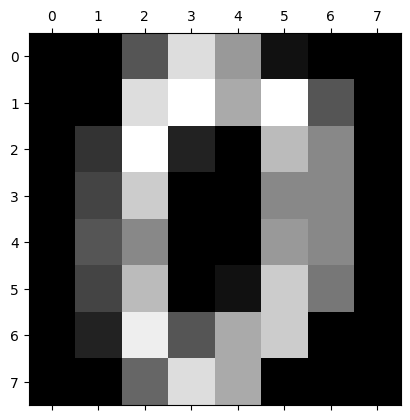

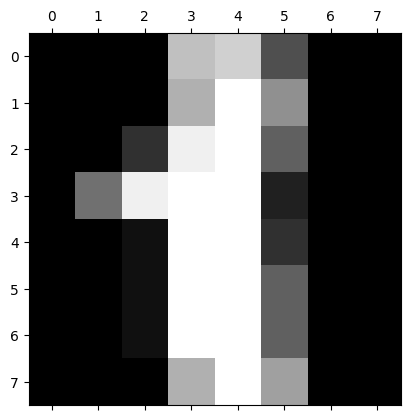

In [6]:
plt.gray()
plt.matshow(digits.images[0])
plt.matshow(digits.images[1])
plt.show()

In [7]:
x, y = load_digits(return_X_y=True)
print("x", x.shape)
print("y", y.shape)

x (1797, 64)
y (1797,)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

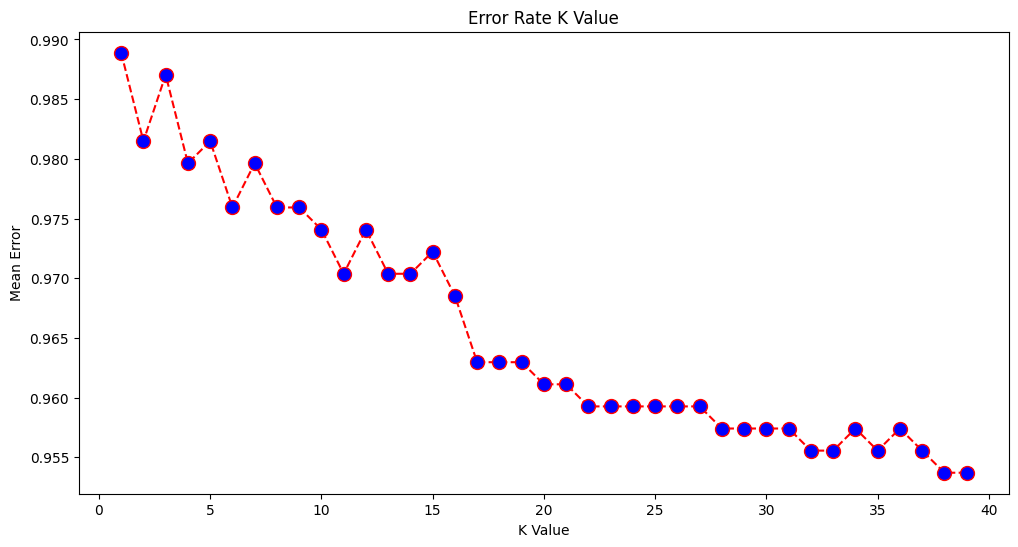

In [24]:
#aplicar knn

#como encontrar k optimo
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred))

accuracy_score 0.9814814814814815


<Axes: >

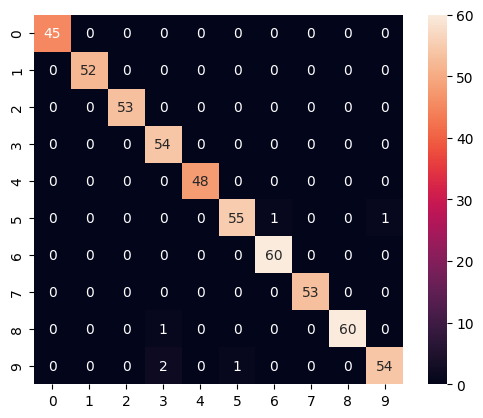

In [22]:
#graficar confusion matrix
matcon = confusion_matrix(y_test, y_pred)
sns.heatmap(matcon, square=True, annot=True)

In [32]:


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        52
           2       0.98      1.00      0.99        53
           3       0.91      0.98      0.95        54
           4       1.00      1.00      1.00        48
           5       0.98      0.96      0.97        57
           6       0.98      1.00      0.99        60
           7       1.00      1.00      1.00        53
           8       1.00      0.95      0.97        61
           9       0.98      0.93      0.95        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [42]:
#Regresion logistica
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

accuracy_score 0.9537037037037037


c:\Users\16joa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
logregL1 = LogisticRegression(penalty='none', solver="newton-cg")
logregL1.fit(x_train, y_train)
y_pred_log_L1 = logregL1.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log_L1))


c:\Users\16joa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


accuracy_score 0.9425925925925925


In [49]:
solver = ['lbfgs', 'newton-cholesky', 'liblinear', 'newton-cg', 'saga', 'sag']

#for i in solver:
logregL1 = LogisticRegression(penalty='none', solver="newton-liblinear")
logregL1.fit(x_train, y_train)
y_pred_log_L1 = logregL1.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log_L1))



InvalidParameterError: The 'solver' parameter of LogisticRegression must be a str among {'lbfgs', 'newton-cholesky', 'liblinear', 'newton-cg', 'saga', 'sag'}. Got 'newton-liblinear' instead.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.89      0.94      0.92        52
           2       0.98      0.92      0.95        53
           3       0.95      0.96      0.95        54
           4       0.98      0.98      0.98        48
           5       0.98      0.96      0.97        57
           6       1.00      0.98      0.99        60
           7       0.98      0.96      0.97        53
           8       0.93      0.87      0.90        61
           9       0.87      0.96      0.92        57

    accuracy                           0.95       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.95      0.95       540



<Axes: >

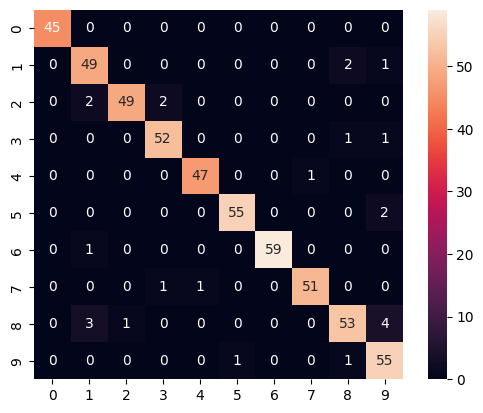

In [51]:

#Regresion logistica
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

#graficar confusion matrix

print(classification_report(y_test, y_pred_log))

matcon_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matcon_log, square=True, annot=True)

In [34]:
#naive bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nb = gnb.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred_nb))

accuracy_score 0.8240740740740741


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.74      0.88      0.81        52
           2       0.96      0.49      0.65        53
           3       0.66      0.85      0.74        54
           4       0.95      0.75      0.84        48
           5       0.98      0.89      0.94        57
           6       0.95      0.98      0.97        60
           7       0.79      0.98      0.87        53
           8       0.61      0.84      0.70        61
           9       0.97      0.58      0.73        57

    accuracy                           0.82       540
   macro avg       0.86      0.83      0.82       540
weighted avg       0.86      0.82      0.82       540



<Axes: >

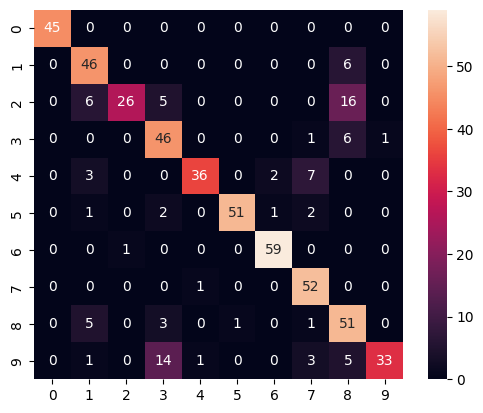

In [50]:

#graficar confusion matrix

print(classification_report(y_test, y_pred_nb))

matcon_log = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matcon_log, square=True, annot=True)

In [3]:
# Spam
df = pd.read_csv("spam_data.csv")
df.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


In [4]:

df['type'].value_counts()

type
nonspam    2788
spam       1813
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [6]:
df["type"].value_counts(normalize=True)

type
0    0.605955
1    0.394045
Name: proportion, dtype: float64

In [7]:
x = df.drop(["type"], axis=1)
y = df["type"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

(3220, 57)

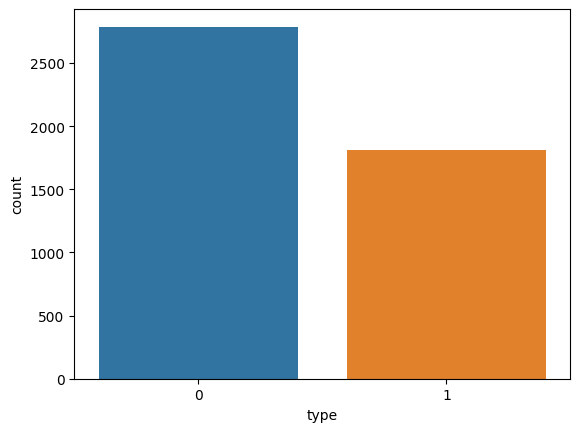

In [8]:
sns.countplot(x="type", data=df)
np.shape(x_train)

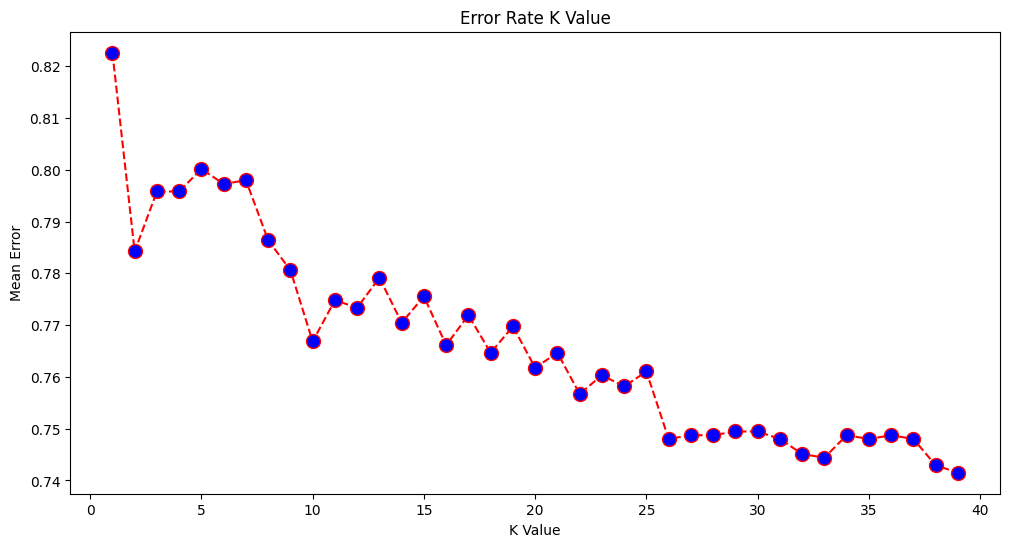

accuracy_score 0.8225923244026068


<Axes: >

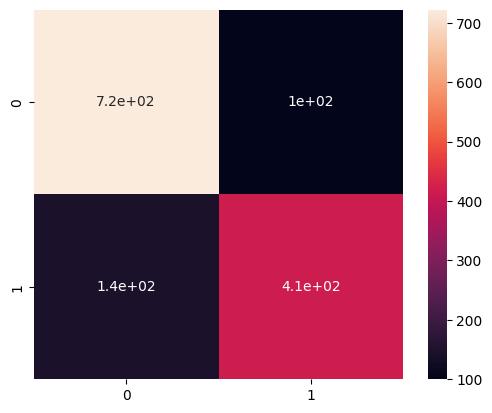

In [10]:
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred))

#graficar confusion matrix
matcon = confusion_matrix(y_test, y_pred)
sns.heatmap(matcon, square=True, annot=True)


In [1]:
import sklearn
print(sklearn.__version__)

1.2.2


accuracy_score 0.9145546705286025
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       822
           1       0.89      0.90      0.90       559

    accuracy                           0.91      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.91      0.91      1381



<Axes: >

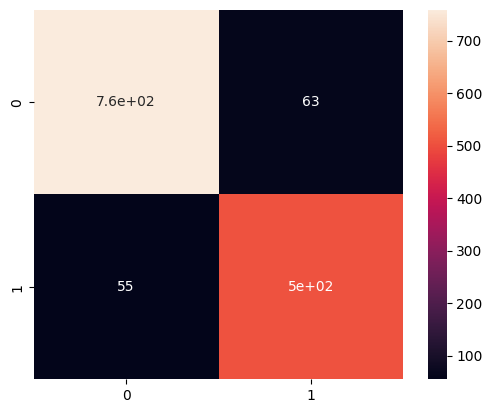

In [14]:
#Regresion logistica
logreg = LogisticRegression(class_weight="balanced", random_state=0, solver="liblinear")
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

#graficar confusion matrix

print(classification_report(y_test, y_pred_log))

matcon_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matcon_log, square=True, annot=True)

accuracy_score 0.8124547429398986
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       822
           1       0.70      0.94      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.85      0.81      0.81      1381



<Axes: >

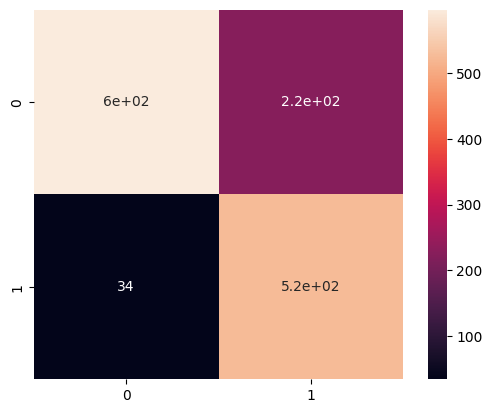

In [13]:
#naive bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nb = gnb.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred_nb))
#graficar confusion matrix

print(classification_report(y_test, y_pred_nb))

matcon_log = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matcon_log, square=True, annot=True)

In [18]:
print(np.shape(x_train))
print(np.shape(y_train))

(3220, 57)
(3220,)


In [21]:
print(y_train.value_counts(normalize = True))

type
0    0.610559
1    0.389441
Name: proportion, dtype: float64


In [26]:
smote = SMOTE(random_state=0)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)
np.shape(x_train_sm)

(3932, 57)

In [29]:
y_train_sm_series = pd.Series(y_train_sm)
y_train_sm_series.value_counts(normalize=True)

type
0    0.5
1    0.5
Name: proportion, dtype: float64

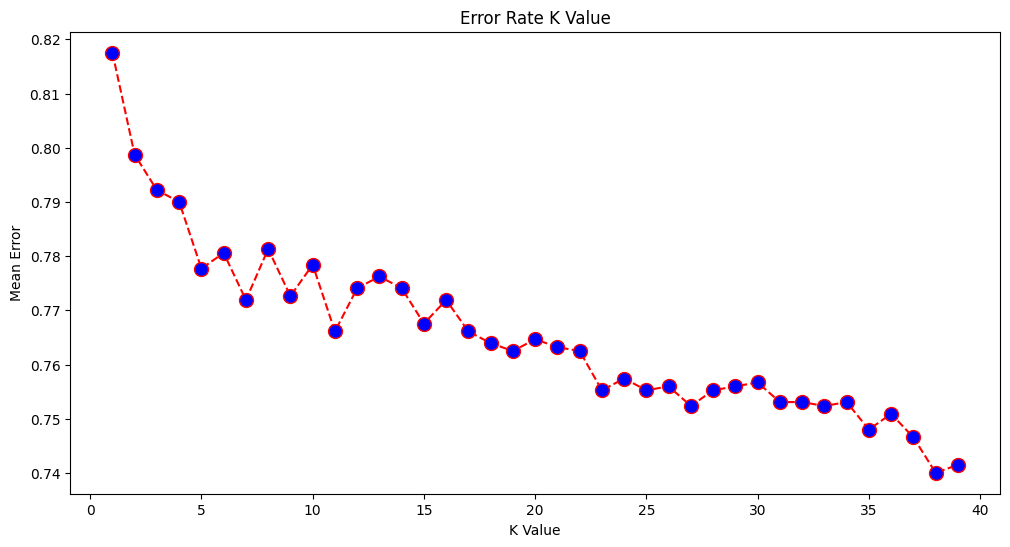

accuracy_score 0.8175235336712527


<Axes: >

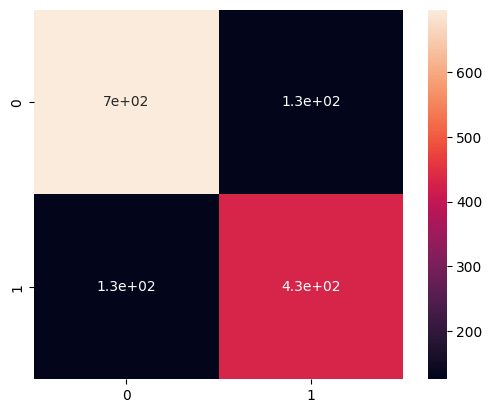

In [30]:
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_sm, y_train_sm)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_sm, y_train_sm)
y_pred = knn.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred))

#graficar confusion matrix
matcon = confusion_matrix(y_test, y_pred)
sns.heatmap(matcon, square=True, annot=True)

accuracy_score 0.8124547429398986
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       822
           1       0.70      0.94      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.85      0.81      0.81      1381



<Axes: >

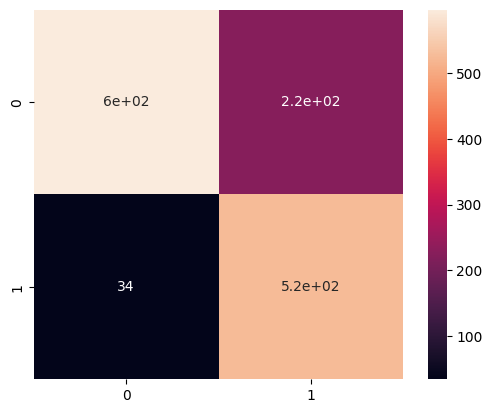

In [31]:
#naive bayes
gnb = GaussianNB()
gnb.fit(x_train_sm, y_train_sm)
y_pred_nb = gnb.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred_nb))
#graficar confusion matrix

print(classification_report(y_test, y_pred_nb))

matcon_log = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matcon_log, square=True, annot=True)

accuracy_score 0.9152787834902245
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       822
           1       0.89      0.90      0.90       559

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



<Axes: >

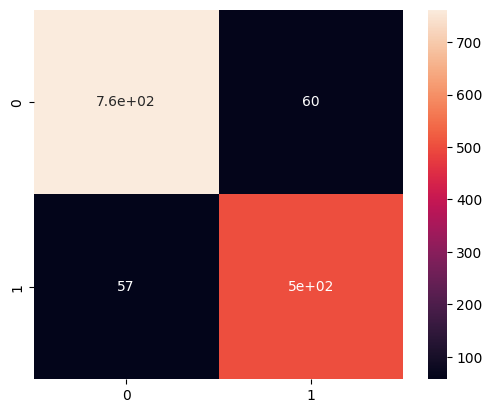

In [33]:
#Regresion logistica
logreg = LogisticRegression(random_state=0, solver="liblinear")
logreg.fit(x_train_sm, y_train_sm)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

#graficar confusion matrix

print(classification_report(y_test, y_pred_log))

matcon_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matcon_log, square=True, annot=True)

In [34]:
#Combined
smotetomek = SMOTETomek(random_state=0)
x_train_st, y_train_st = smotetomek.fit_resample(x_train, y_train)
print("np.shape(x_train_st)", np.shape(x_train_st))

smoteenn = SMOTEENN(random_state=0)
x_train_se, y_train_se = smoteenn.fit_resample(x_train, y_train)
print("np.shape(x_train_se)", np.shape(x_train_se))

np.shape(x_train_st) (3802, 57)
np.shape(x_train_se) (2587, 57)


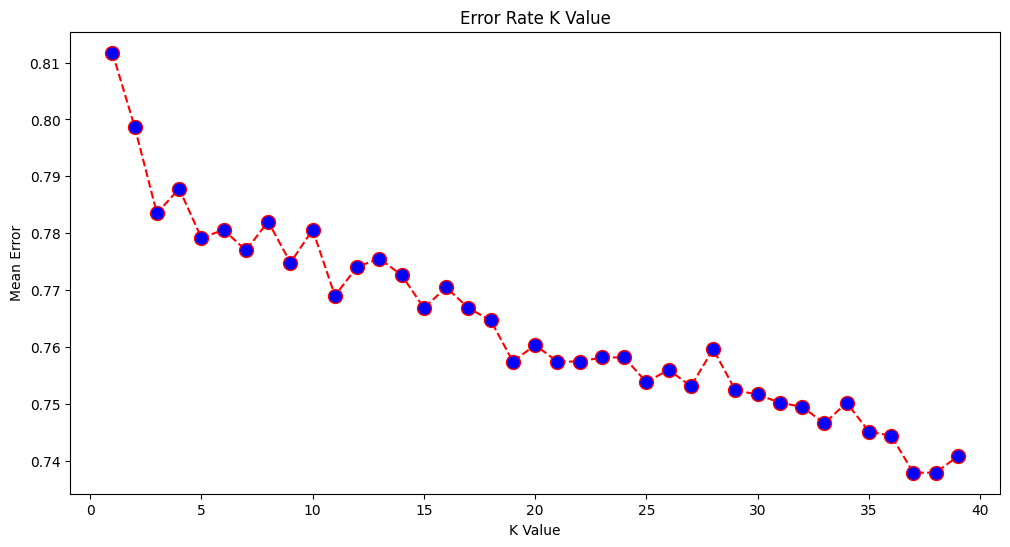

accuracy_score 0.8117306299782766


<Axes: >

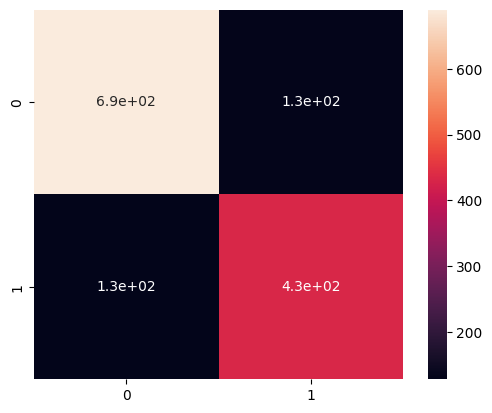

In [35]:
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_st, y_train_st)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_st, y_train_st)
y_pred = knn.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred))

#graficar confusion matrix
matcon = confusion_matrix(y_test, y_pred)
sns.heatmap(matcon, square=True, annot=True)

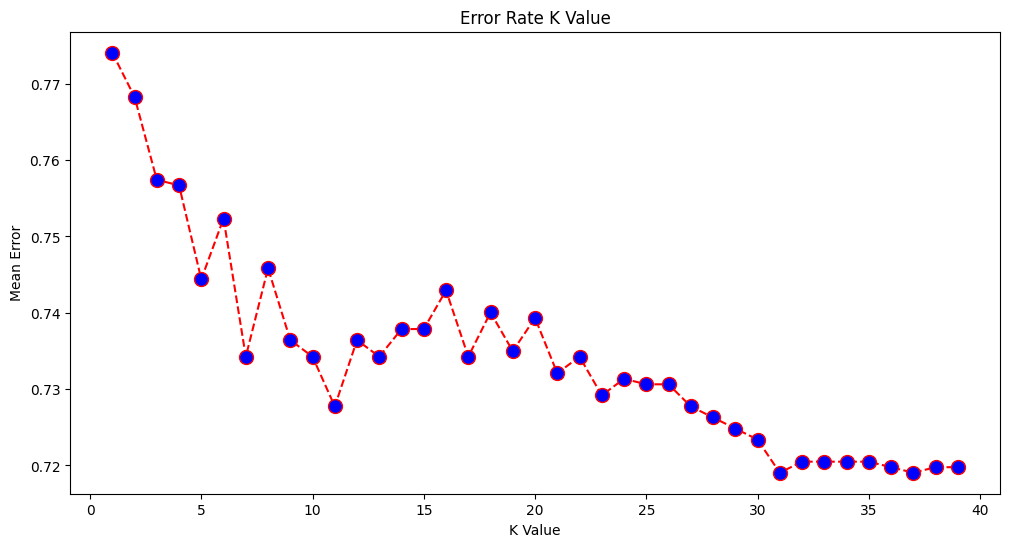

accuracy_score 0.7740767559739319


<Axes: >

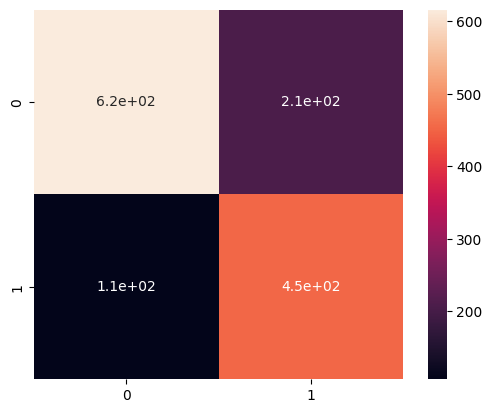

In [36]:
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_se, y_train_se)
    y_pred = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_se, y_train_se)
y_pred = knn.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred))

#graficar confusion matrix
matcon = confusion_matrix(y_test, y_pred)
sns.heatmap(matcon, square=True, annot=True)

accuracy_score 0.8139029688631426
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       822
           1       0.70      0.94      0.80       559

    accuracy                           0.81      1381
   macro avg       0.82      0.83      0.81      1381
weighted avg       0.85      0.81      0.82      1381



<Axes: >

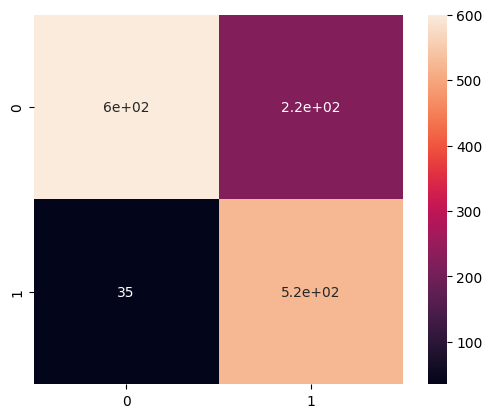

In [37]:
#naive bayes
gnb = GaussianNB()
gnb.fit(x_train_st, y_train_st)
y_pred_nb = gnb.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred_nb))
#graficar confusion matrix

print(classification_report(y_test, y_pred_nb))

matcon_log = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matcon_log, square=True, annot=True)

accuracy_score 0.834902244750181
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       822
           1       0.73      0.94      0.82       559

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.86      0.83      0.84      1381



<Axes: >

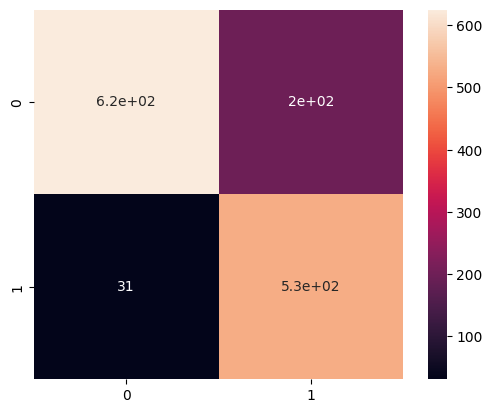

In [38]:
#naive bayes
gnb = GaussianNB()
gnb.fit(x_train_se, y_train_se)
y_pred_nb = gnb.predict(x_test)

print("accuracy_score", accuracy_score(y_test, y_pred_nb))
#graficar confusion matrix

print(classification_report(y_test, y_pred_nb))

matcon_log = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(matcon_log, square=True, annot=True)

In [39]:
#0.9152

#Regresion logistica
logreg = LogisticRegression(random_state=0, solver="liblinear")
logreg.fit(x_train_st, y_train_st)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

#graficar confusion matrix

print(classification_report(y_test, y_pred_log))
"""
matcon_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matcon_log, square=True, annot=True)"""

accuracy_score 0.9152787834902245
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       822
           1       0.89      0.90      0.90       559

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



'\nmatcon_log = confusion_matrix(y_test, y_pred_log)\nsns.heatmap(matcon_log, square=True, annot=True)'

In [40]:
#Regresion logistica
logreg = LogisticRegression(random_state=0, solver="liblinear")
logreg.fit(x_train_se, y_train_se)
y_pred_log = logreg.predict(x_test)
print("accuracy_score", accuracy_score(y_test, y_pred_log))

#graficar confusion matrix
"""
print(classification_report(y_test, y_pred_log))

matcon_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(matcon_log, square=True, annot=True)"""

accuracy_score 0.9131064446053584


'\nprint(classification_report(y_test, y_pred_log))\n\nmatcon_log = confusion_matrix(y_test, y_pred_log)\nsns.heatmap(matcon_log, square=True, annot=True)'